In [23]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
import pickle
sns.set()

In [3]:
data=pd.read_csv("diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


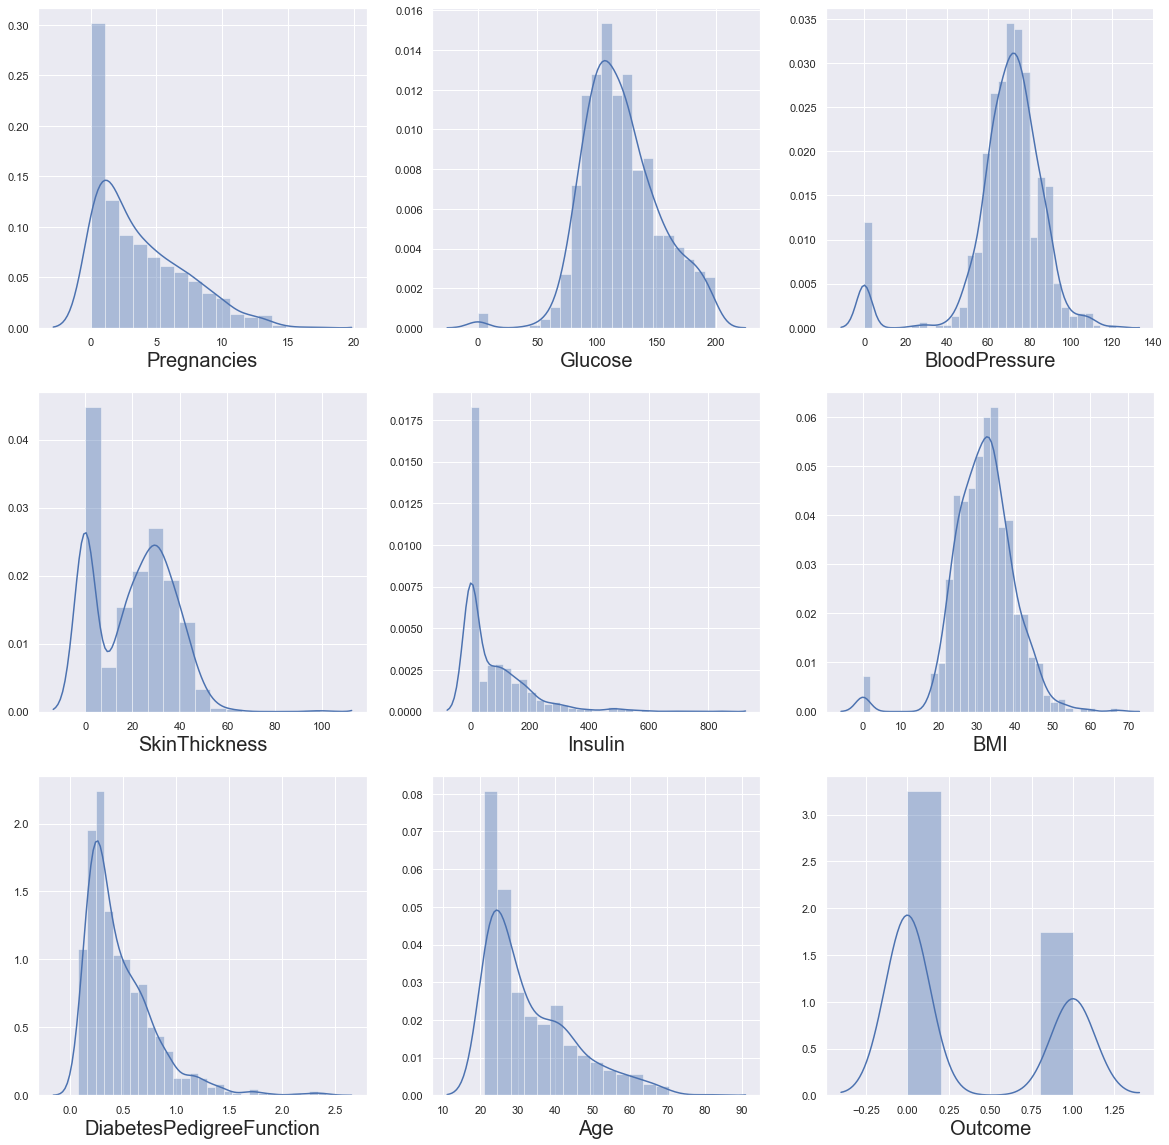

In [6]:
plt.figure(figsize=(20,20),facecolor='White')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [7]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

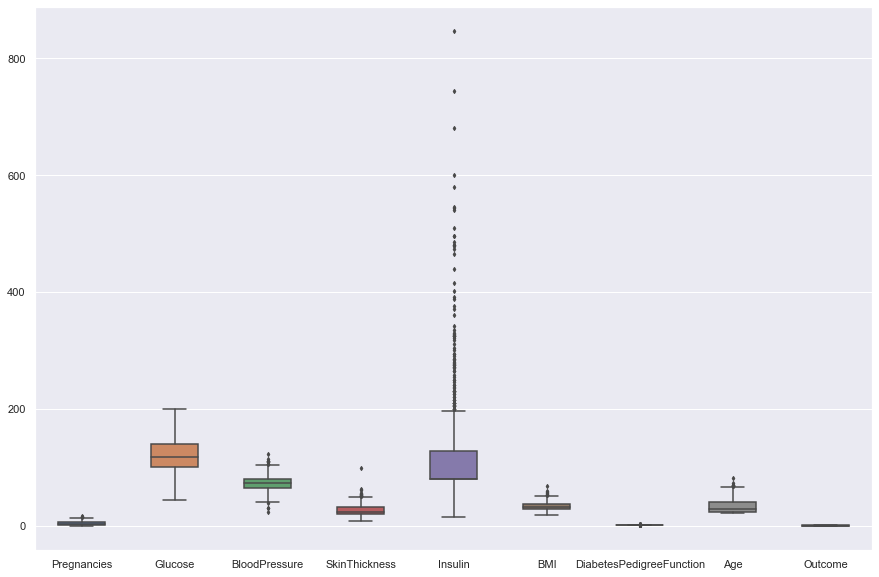

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)


In [12]:
data.shape

(768, 9)

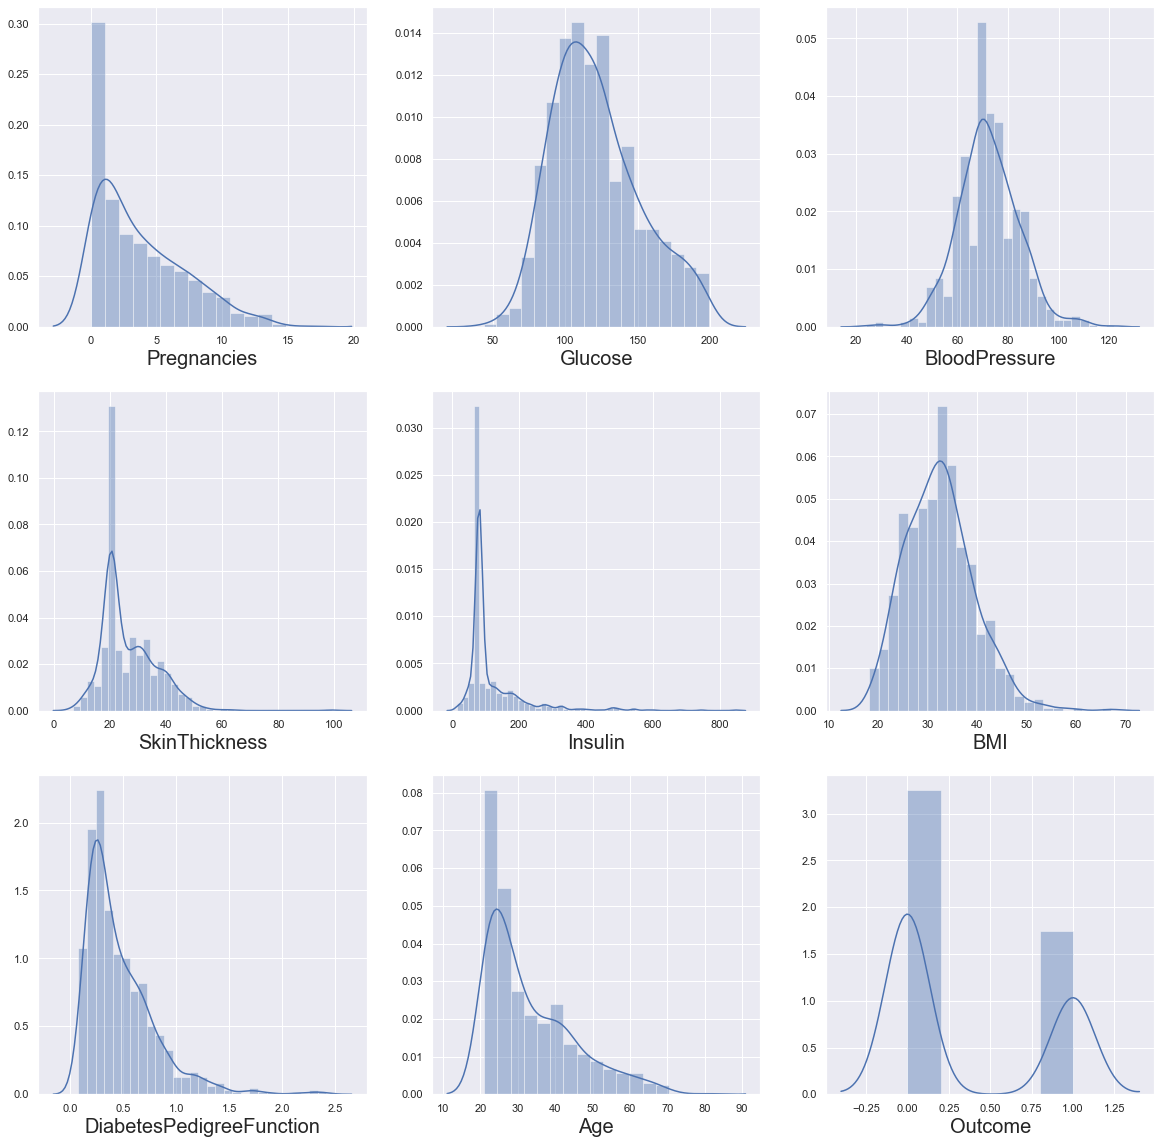

In [8]:
plt.figure(figsize=(20,20),facecolor='White')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [10]:
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

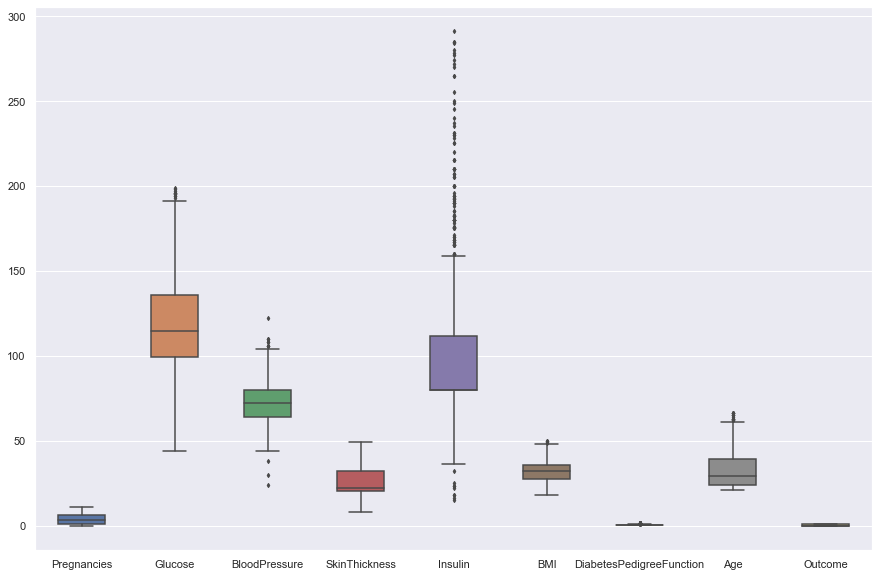

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width= 0.5,ax=ax,  fliersize=3)

In [14]:
data_cleaned.shape
data_cleaned.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,3.602374,119.217318,71.994622,25.721354,101.061453,31.904204,0.447338,32.454006,0.327893
std,3.011478,29.272890,11.891728,8.507237,49.005425,6.384238,0.285170,10.964692,0.469794
min,0.000000,44.000000,24.000000,8.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.536458,79.799479,27.300000,0.238000,24.000000,0.000000
50%,3.000000,114.500000,72.000000,22.000000,79.799479,31.992578,0.356000,29.000000,0.000000
75%,6.000000,136.000000,80.000000,32.000000,111.500000,35.800000,0.600000,39.000000,1.000000
max,11.000000,199.000000,122.000000,49.000000,291.000000,50.000000,1.476000,66.000000,1.000000


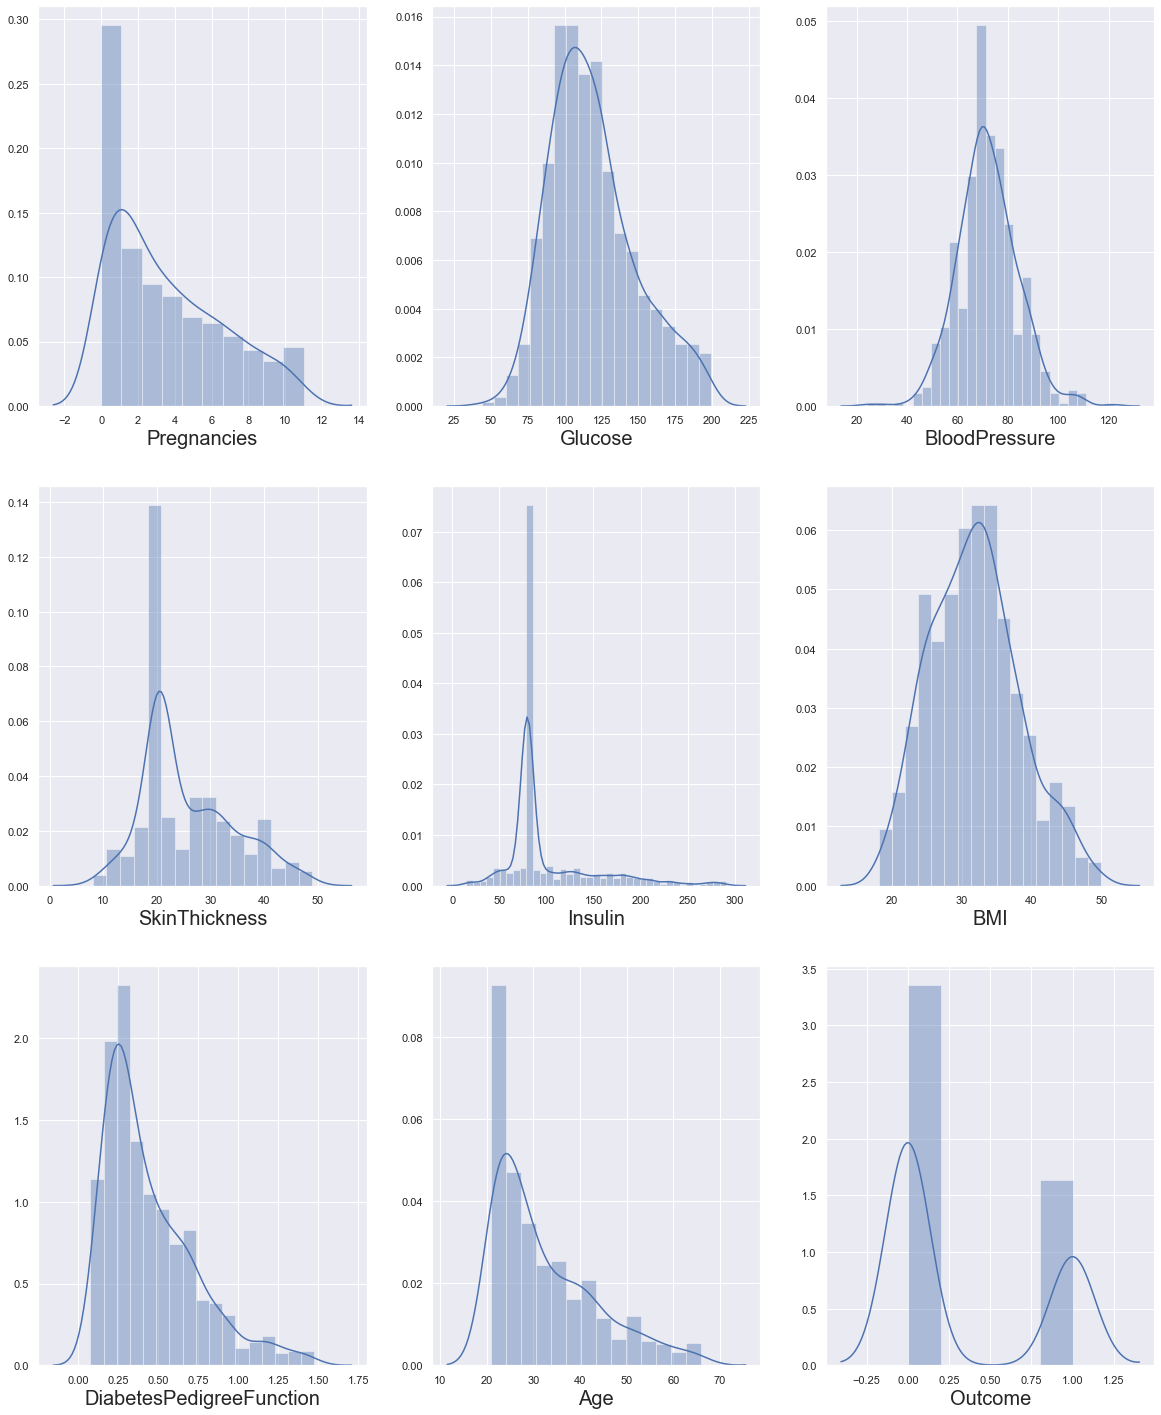

In [15]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [16]:
X = data_cleaned.drop(columns = ['Outcome'])
y = data_cleaned['Outcome']

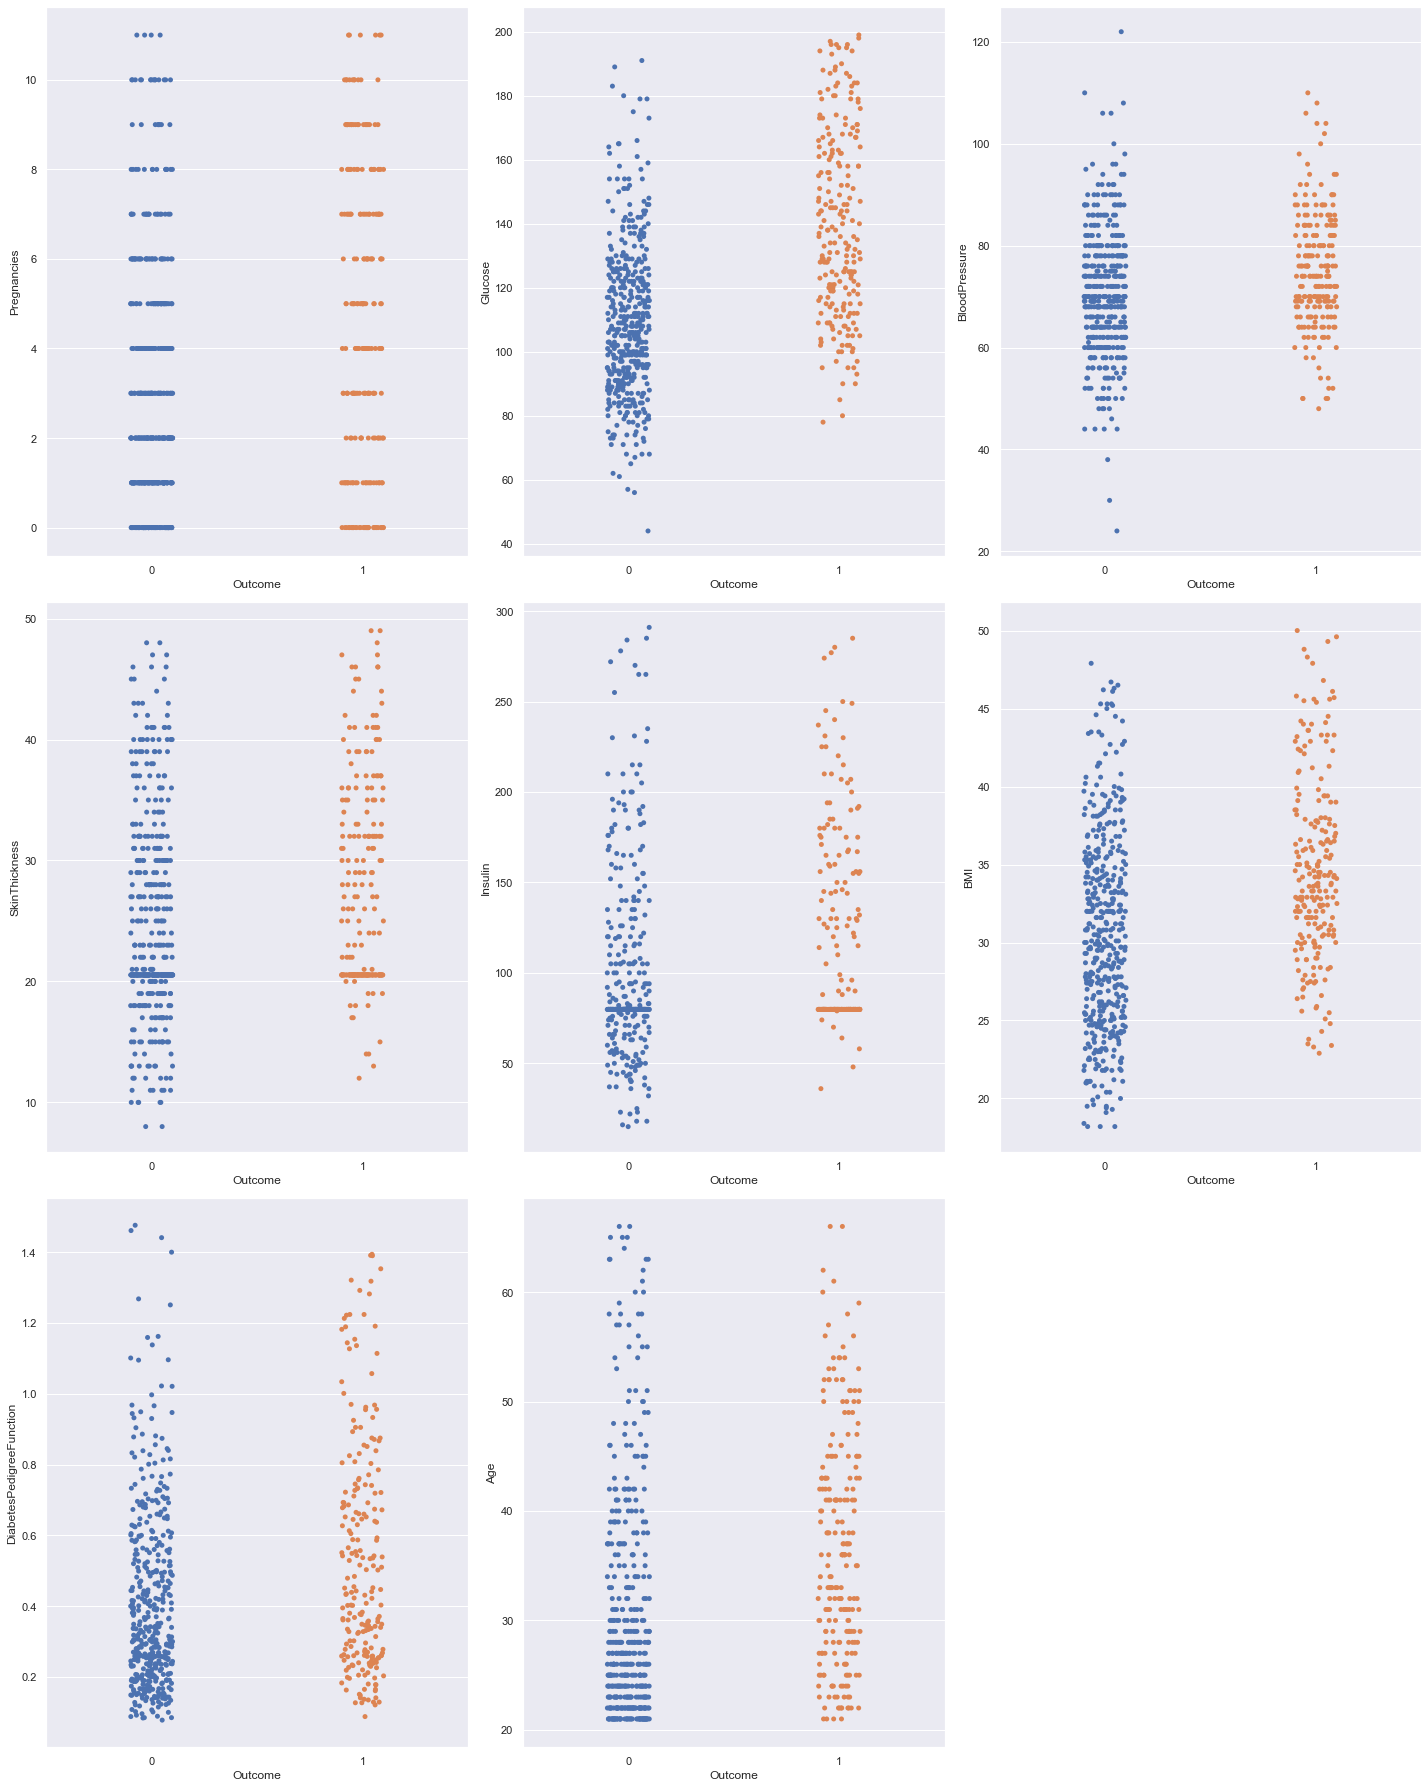

In [17]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [18]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [19]:
X_scaled

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

In [20]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.449056,Pregnancies
1,1.304263,Glucose
2,1.262686,BloodPressure
3,1.470049,SkinThickness
4,1.271017,Insulin
5,1.513160,BMI
6,1.042300,DiabetesPedigreeFunction
7,1.662728,Age


In [21]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [22]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\Users\ASHUTOSH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [25]:
y_pred = log_reg.predict(x_test)

In [26]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8284023668639053

In [27]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[108,   9],
       [ 20,  32]], dtype=int64)

In [28]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [29]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8284023668639053

In [30]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9230769230769231

In [31]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.84375

In [32]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8816326530612245

In [33]:
x_test[0]

array([-0.53248405, -1.30652289, -1.0094016 , -0.43775883, -0.43419202,
       -0.65901773, -0.55214518, -0.68032385])

In [34]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object